In [1]:
import pandas as pd
import joblib

#load test data
x_test = pd.read_csv("./x_test.csv", index_col=None, header=0,sep = ',',encoding="utf-8")
y_test = pd.read_csv('./y_test.csv',index_col=None)['T/total']

#load model
xgbr = joblib.load('xgb')

#get importance ratio
feature_important = xgbr.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
avg_fi = 0
c_sum = 0
for i in zip(keys,values):
    if i[0] == 'avg':
        avg_fi = i[-1]
    c_sum += i[-1]
pecentage = avg_fi/(c_sum - avg_fi)
print('importance that chromatin accessibility parameter taking up relative to the context-sequence = ',pecentage)

importance that chromatin accessibility parameter taking up relative to the context-sequence =  0.16300833758720434


/Users/liyaqiu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(27.0, 0.5, 'Measured BE4max Efficiency')

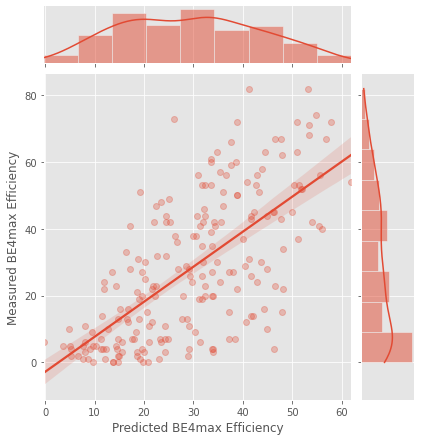

In [5]:
#plot test/predicted_test
import scipy
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

xgbr_y_predict=xgbr.predict(x_test)
x = xgbr_y_predict
y = y_test

g = sns.jointplot(x,y, kind = "reg",joint_kws = {'scatter_kws':dict(alpha=0.3)}                )
g.ax_joint.set_xlabel('Predicted BE4max Efficiency')
g.ax_joint.set_ylabel('Measured BE4max Efficiency')